In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# KNN Demo

K-nearest neighbor classifier demonstration

1) Load Iris data set, we use only the 3rd and 4th feature as feature vectors X, and partition it into 3-way cross validation. We create a 150 x 3 Label matrix so that a class 1 sample  is labeled as 1 0 0 , a class 2 sample 0 1 0 and a class 3 sample 0 0 1.  

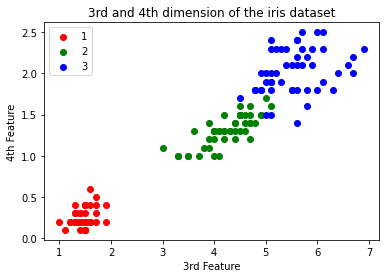

In [30]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

tmp = pd.read_csv('/content/drive/My Drive/Colab Notebooks/iris.csv',header=None).to_numpy()
X = tmp[:,2:4]        # 150 x 2
K = np.shape(tmp)[0]  # K = 150 = # of feature vectors, size of training data set.
C = 3     # Number of class labels
# tmp[:,4] contains labels 1,2, or 3.
# Below, we convert the label vector tmp[:,4] to a K x 3 matrix label. 
# Each row is a 1 in 3 encoding of the corresponding label. 
Label = [tmp[:,4] == 1, tmp[:,4] == 2, tmp[:,4] == 3]

# Scatter plot the 2D data.

plt.scatter(X[Label[0],0],X[Label[0],1],c='red')
plt.scatter(X[Label[1],0],X[Label[1],1],c='green')
plt.scatter(X[Label[2],0],X[Label[2],1],c='blue')
plt.xlabel('3rd Feature'), plt.ylabel('4th Feature')
plt.title('3rd and 4th dimension of the iris dataset')
plt.legend([1,2,3])
plt.show()



2) Use 3 way cross validation to check the Knn performance with above feature and labels. 

First we partition the indices into 3 nonoverlap partitions

In [31]:
Iv = [[]] * 3
Ir = [[]] * 3

for m in range(3):
  Iv[m] = range(m,K,3) # Indices of 10 validation sets.
  Ir[m] = np.setdiff1d(range(K),Iv[m])


Next apply knn to Ir{m} and validate on Iv{m}

In [32]:
Neighbors = 9
Label_mat = np.mat(Label).T.astype('int')

for n in range(Neighbors):
  ConfMatcv3 = np.zeros((C,1))
  for m in range(3):
    Xtemp = X[Ir[m],:]
    Ltemp = Label_mat[Ir[m],:]
    KNNmdl = knnc(Xtemp, Ltemp)
    out = knnclassifier(KNNmdl, X[Iv[m],:], n+1)

    ConfMatcv3 = ConfMatcv3 + Label_mat[Iv[m],:].T*out
  print(['CV3: Confusion Matrix of ' + str(n+1) + ' neighbors = '])
  print(ConfMatcv3)
  print(['   Pr. Classification = ' + str(100*np.sum(np.diag(ConfMatcv3))/np.shape(X)[0])])

['CV3: Confusion Matrix of 1 neighbors = ']
[[50.  0.  0.]
 [ 0. 47.  3.]
 [ 0.  4. 46.]]
['   Pr. Classification = 95.33333333333333']
['CV3: Confusion Matrix of 2 neighbors = ']
[[50.  0.  0.]
 [ 0. 48.  2.]
 [ 0.  6. 44.]]
['   Pr. Classification = 94.66666666666667']
['CV3: Confusion Matrix of 3 neighbors = ']
[[50.  0.  0.]
 [ 0. 48.  2.]
 [ 0.  5. 45.]]
['   Pr. Classification = 95.33333333333333']
['CV3: Confusion Matrix of 4 neighbors = ']
[[50.  0.  0.]
 [ 0. 48.  2.]
 [ 0.  6. 44.]]
['   Pr. Classification = 94.66666666666667']
['CV3: Confusion Matrix of 5 neighbors = ']
[[50.  0.  0.]
 [ 0. 47.  3.]
 [ 0.  3. 47.]]
['   Pr. Classification = 96.0']
['CV3: Confusion Matrix of 6 neighbors = ']
[[50.  0.  0.]
 [ 0. 47.  3.]
 [ 0.  5. 45.]]
['   Pr. Classification = 94.66666666666667']
['CV3: Confusion Matrix of 7 neighbors = ']
[[50.  0.  0.]
 [ 0. 47.  3.]
 [ 0.  3. 47.]]
['   Pr. Classification = 96.0']
['CV3: Confusion Matrix of 8 neighbors = ']
[[50.  0.  0.]
 [ 0. 47.  3.]


This is the function nbc that create a classifier object nbmodel using training data (X, Y). Assume each row of X is a 1 x d feature vector of a sample. Feature dimension = d. Each row of Y is an 1 of C encoding of the class label with C classes. The classifier object is a structured data object defined in the end of the function. 

In [3]:
def knnc(X,Y):
  # Usage: knnmodel = knnc(X,Y)
  # developing a K-nearest neighbor classifier using
  # X: training features, K by d matrix. Each row of X is an
  #    observation, d is the feature dimension, K is the total
  #    number of feature vectors in the training set. 
  # Y: Kx C label matrix encoded in 1 of C format where C is the number of classes. 
  (K,d) = np.shape(X)
  C = np.shape(Y)[1]
  prp = np.sum(Y,1)/np.sum(Y)

  knnmodel = {}
  knnmodel['Nsamples'] = K
  knnmodel['Feature Dimension'] = d
  knnmodel['Nclass'] = C
  knnmodel['TrainingSamples'] = X
  knnmodel['TrainingLabels'] = Y

  return knnmodel

Applying testing data and label to a trained Naive Bayes Classifier to estimate the testing error. 

Compute distance between X and knnmodel.TrainingSamples using matlab built-in function dist(W,P) where W is K x d and P is a d x N matrix. The output D = dist(W,P) is a K x N matrix. The (k,n)-th element of the D matrix is the Eucledian distance between k-th row of the W matrix and n-th column of the P matrix 
In the current application, P = knnmodel.TrainingSamples', d x Kr where Kr is the number of training samples. W = X, a K x d testing/validation feature matrix. Thus, 

Rank order the nearest neighbors. This requires sorting each row of the D matrix using Matlab command [B,Idx]=sort(D); where B is the sorted distance from small to large and Idx is the index of the training samples. 

Compute classifier output out. 
If Knn = 1 (nearest neighbor classifier), the indices of nearest training sample is the first column of the Idx matrix. The NN classifier thus will return the training sample's labels of these indexed training samples. 
If Knn > 1 (K nearest neighbor classifier), the indices of Knn closest neighbors are in the first Knn columns of the Idx matrix. To let the corresponding labels take majority vote. For example, if the nearest three neighbors of the first testing sample have labels [1 0 0], [0 1 0] and [1 0 0], they will add to [2 1 0]. Hence the majority voted output will be [1 0 0]. We create a K x C matrix tmp initialized as a zero matrix. In each of the knn = 3 iterations, its first row will be added to [1 0 0], [0 1 0] and [1 0 0] respectively and ended with [2 1 0]. Then we will use [~,I] = max([2  0 0],[],2) command to obtain I = 1 (class 1) as the voted result. Thus the corresponding row of out  = Lmat(I,:) where Lmat = eye(C) is a C x C identity matrix that gives the 1 in C encoding of class labels. 

In [21]:


def knnclassifier(knnmodel,X,Kn = 1):
  # Usage: out = knnclassifier(knnmodel, X, Knn, distype)
  # Given a KNN Classifier model knnmodel,
  # X: Testing Feature,
  # Kn: k nearest neighbor, default (if ignored ) = 1. A positive integer.
  # disttype: type of distance metric, default: L2 Norm. 
  # out: predicted output using Knnmodel (1 in C format)
  # knnmodel has the following structure:
  #    knnmodel['Nsamples'] = K            # Number of training samples
  #    knnmodel['Feature Dimension'] = d   # Feature space Dimension
  #    knnmodel['Nclass'] = C              # Number of Classes
  #    knnmodel['TrainingSamples']
  #    knnmodel['TrainingLabels']

  out = []
  D = dist(X,knnmodel["TrainingSamples"].T)
  Idx = np.argsort(D,-1)

  if Kn == 1:
    out = knnmodel["TrainingLabels"][Idx[:,0],:]
  elif Kn > 1:
    Lmat = np.eye(knnmodel["Nclass"])  # Class label Matrix
    tmp = np.zeros((np.shape(X)[0],knnmodel["Nclass"]))     # to compute cumulated output labels
    for k in range(Kn):

      tmp = tmp + knnmodel["TrainingLabels"][Idx[:,k],:] # Adding these labels
      # finding the index of the maximum entry in each row of the tmp matrix.
      Imax = np.argmax(tmp,axis=1 )
      out = Lmat[Imax,:]
      #print(out)

  return out


In [22]:
def dist(W,P):
  K,d1 = np.shape(W)
  d2,N = np.shape(P)

  d = np.zeros((K,N))
  for k in range(K):
    for n in range(N):
      x = W[k,:]
      y = P[:,n]
      d[k,n] = np.linalg.norm(x - y,2)
  return d